# Calculate power for a t-test

In [3]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns

In [103]:
# Parameters
effect_size = 0.5 # cohen's d
alpha = 0.05 # type I error rate
power = 0.8 # type II error rate
n_samples = np.array(range(2,101))
# niter = 1000

In [104]:
# Calculate the threshold t-statistic
t_thres = sp.stats.t.isf(alpha,n_samples-1)

In [105]:
# Calculate resulting t-statistic with the desired effect size and power
#t_effect = effect_size*np.sqrt(n_samples)
t_effect = sp.stats.nct.isf(power,n_samples-1,nc=effect_size*np.sqrt(n_samples))

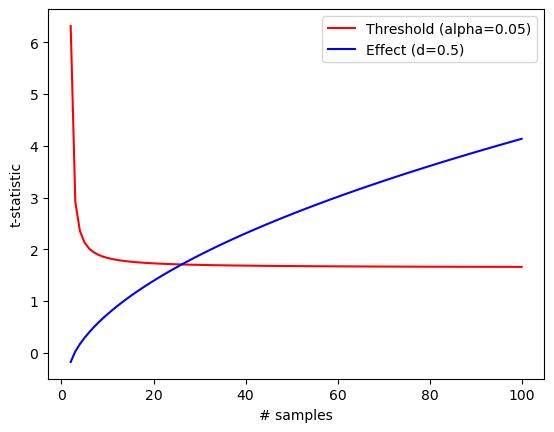

In [106]:
# Plot both curves
plt.plot(n_samples,t_thres,'r')
plt.plot(n_samples,t_effect,'b')
plt.xlabel('# samples')
plt.ylabel('t-statistic')
plt.legend([f'Threshold (alpha={alpha})',f'Effect (d={effect_size})'])
plt.show()
# The point where the effect crosses the threshold is the minimum sample size

In [107]:
# Identify smallest sample size where the effect crosses the threshold
min_idx = np.where(t_effect>t_thres)[0][0]
min_n = n_samples[min_idx]
min_t = t_effect[min_idx]
print(f"Minimum sample size: {min_n}")
print(f"t-statistic: {min_t}")

Minimum sample size: 27
t-statistic: 1.7491117260016038


In [108]:
pval = 1-sp.stats.t.cdf(min_t,min_n-1)
pwr_val = 1-sp.stats.nct.cdf(min_t,min_n-1,nc=effect_size*np.sqrt(min_n))
print(f"p-value: {pval}")
print(f"power: {pwr_val}")

p-value: 0.046034742416412255
power: 0.8


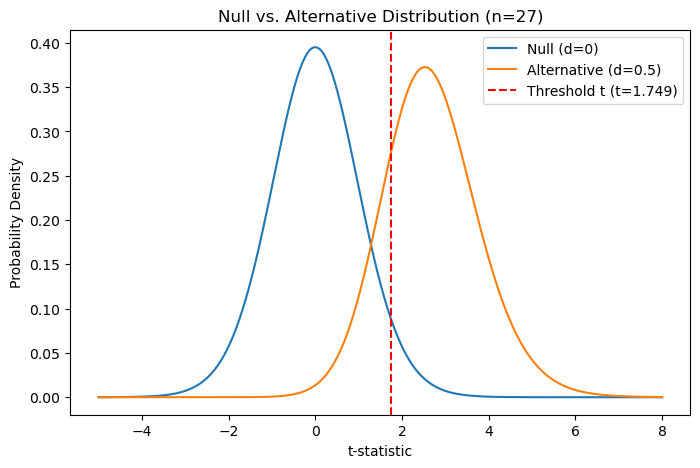

In [109]:
# Plot both the null distribution and the alternative distribution
n = min_n
# Null distribution: t with n-1 df, noncentrality=0
x = np.linspace(-5, 8, 500)
null_dist = sp.stats.t(df=n-1)
alt_dist = sp.stats.nct(df=n-1, nc=effect_size*np.sqrt(n))

plt.figure(figsize=(8,5))
plt.plot(x, null_dist.pdf(x), label='Null (d=0)')
plt.plot(x, alt_dist.pdf(x), label=f'Alternative (d={effect_size})')
plt.axvline(min_t, color='red', linestyle='--', label=f'Threshold t (t={min_t:.3f})')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.title(f'Null vs. Alternative Distribution (n={n})')
plt.show()
